In [1]:
import numpy as np

In [2]:
# How to implement Linear Regression using function
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def update_parameters(X, y, weights, bias, learning_rate):
    n_samples = len(y)
    y_pred = predict(X, weights, bias)
    dw = -(1 / n_samples) * np.dot(X.T, (y - y_pred))
    db = -(1 / n_samples) * np.sum(y - y_pred)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

In [3]:
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

In [4]:
weights, bias = initialize_parameters(X.shape[1])
learning_rate = 0.01
for _ in range(1000):
    weights, bias = update_parameters(X, y, weights, bias, learning_rate)

In [6]:
y_pred = predict(X, weights, bias)
y_pred

array([2.08994619, 4.04358509, 5.99722399, 7.95086289])

In [7]:
# Linear regression using class
class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y, epochs=1000):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        for _ in range(epochs):
            y_pred = self.predict(X)
            loss = self.compute_loss(y, y_pred)
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

# Example usage
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])
model = LinearRegression(learning_rate=0.01)
model.train(X, y)
y_pred = model.predict(X)
print(y_pred)

[2.02006328 4.00972203 5.99938079 7.98903954]


In [8]:
import torch
import torch.nn as nn

In [24]:
# Linear regression using PyTorch
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

In [25]:
linear_model = LinearRegressionModel(2)

In [26]:
x_train = torch.randn(100, 2)
y_train = torch.randn(100, 1)

In [27]:
# Loss function
criterion = nn.MSELoss()

In [28]:
import torch.optim as optim
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)  # We will use stochastic gradient descent

In [29]:
num_epocs = 2000
for epochs in range(num_epocs):
    linear_model.train()  # Set the model to training mode
    optimizer.zero_grad() # To avoid accumulation of gradients
    y_pred = linear_model(x_train) # Forward pass
    loss = criterion(y_pred, y_train) # Calculation the loss
    loss.backward() # Bacward pass
    optimizer.step() # Update the parameters
    if (epochs+1) % 100 == 0:
        print(f'Epoch [{epochs + 1}], Loss: {loss.item(): .4f}')

Epoch [100], Loss:  1.1398
Epoch [200], Loss:  1.1357
Epoch [300], Loss:  1.1356
Epoch [400], Loss:  1.1356
Epoch [500], Loss:  1.1356
Epoch [600], Loss:  1.1356
Epoch [700], Loss:  1.1356
Epoch [800], Loss:  1.1356
Epoch [900], Loss:  1.1356
Epoch [1000], Loss:  1.1356
Epoch [1100], Loss:  1.1356
Epoch [1200], Loss:  1.1356
Epoch [1300], Loss:  1.1356
Epoch [1400], Loss:  1.1356
Epoch [1500], Loss:  1.1356
Epoch [1600], Loss:  1.1356
Epoch [1700], Loss:  1.1356
Epoch [1800], Loss:  1.1356
Epoch [1900], Loss:  1.1356
Epoch [2000], Loss:  1.1356


In [60]:
# Simple neural network to perform regression
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [61]:
model = RegressionNN()

In [62]:
print(model)

RegressionNN(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [63]:
params = list(model.parameters())

In [64]:
# Loss function 
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [65]:
x_train = torch.randn(100, 4)
y_train = torch.randn(100, 1)

In [66]:
num_epochs = 1000
losses = []

for epoch in range(num_epocs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epochs+1) % 100 == 0:
        print(f'Epoch [{num_epochs + 1}], Loss: {loss.item(): .4f}')

Epoch [1001], Loss:  0.8786
Epoch [1001], Loss:  0.8587
Epoch [1001], Loss:  0.8441
Epoch [1001], Loss:  0.8343
Epoch [1001], Loss:  0.8275
Epoch [1001], Loss:  0.8224
Epoch [1001], Loss:  0.8180
Epoch [1001], Loss:  0.8141
Epoch [1001], Loss:  0.8099
Epoch [1001], Loss:  0.8052
Epoch [1001], Loss:  0.8001
Epoch [1001], Loss:  0.7949
Epoch [1001], Loss:  0.7903
Epoch [1001], Loss:  0.7860
Epoch [1001], Loss:  0.7820
Epoch [1001], Loss:  0.7781
Epoch [1001], Loss:  0.7740
Epoch [1001], Loss:  0.7697
Epoch [1001], Loss:  0.7652
Epoch [1001], Loss:  0.7605
Epoch [1001], Loss:  0.7559
Epoch [1001], Loss:  0.7513
Epoch [1001], Loss:  0.7466
Epoch [1001], Loss:  0.7419
Epoch [1001], Loss:  0.7370
Epoch [1001], Loss:  0.7320
Epoch [1001], Loss:  0.7269
Epoch [1001], Loss:  0.7217
Epoch [1001], Loss:  0.7165
Epoch [1001], Loss:  0.7112
Epoch [1001], Loss:  0.7058
Epoch [1001], Loss:  0.7005
Epoch [1001], Loss:  0.6949
Epoch [1001], Loss:  0.6893
Epoch [1001], Loss:  0.6837
Epoch [1001], Loss: 

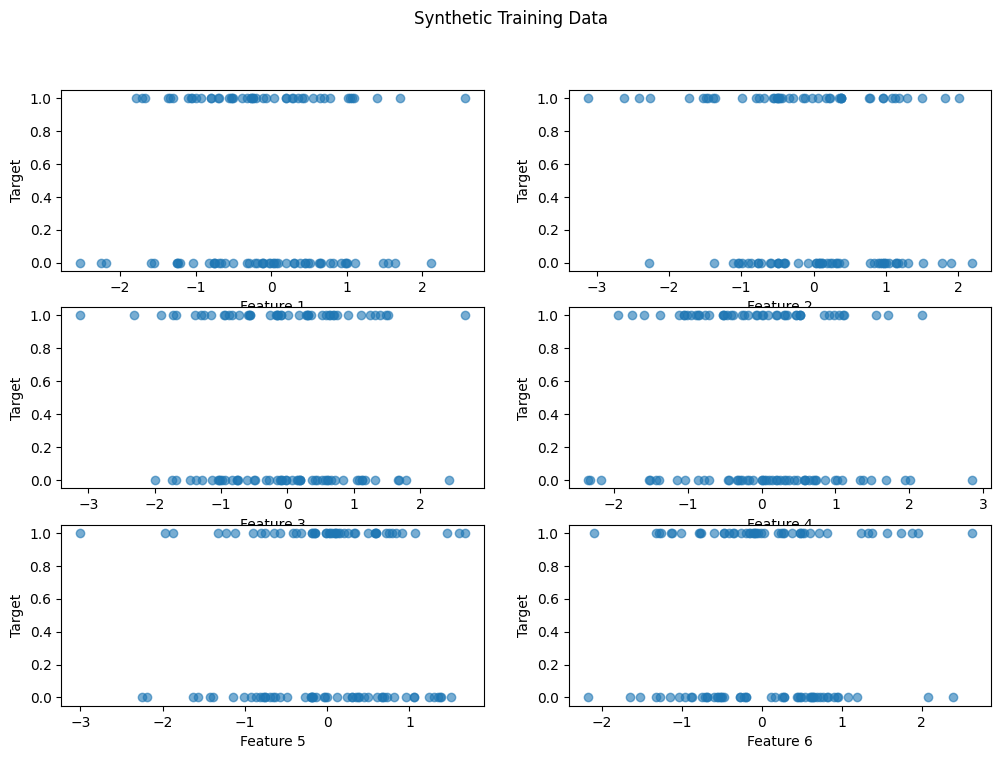

Epoch [10/100], Loss: 0.6708
Epoch [20/100], Loss: 0.6342
Epoch [30/100], Loss: 0.5825
Epoch [40/100], Loss: 0.5158
Epoch [50/100], Loss: 0.4339
Epoch [60/100], Loss: 0.3480
Epoch [70/100], Loss: 0.2660
Epoch [80/100], Loss: 0.1900
Epoch [90/100], Loss: 0.1238
Epoch [100/100], Loss: 0.0740


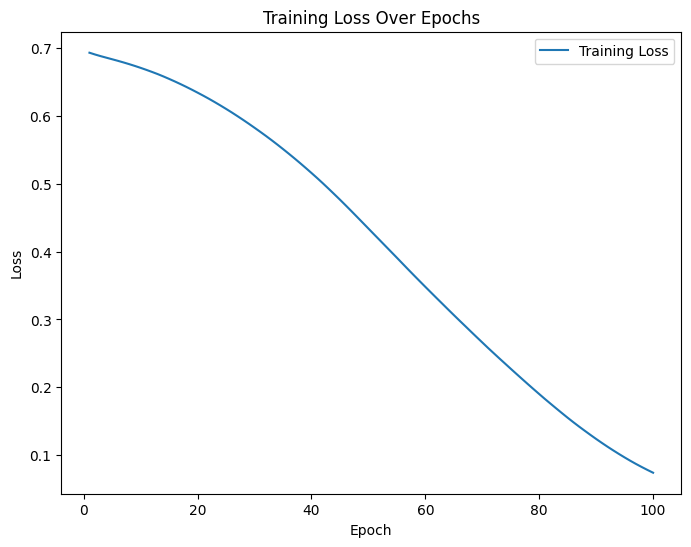

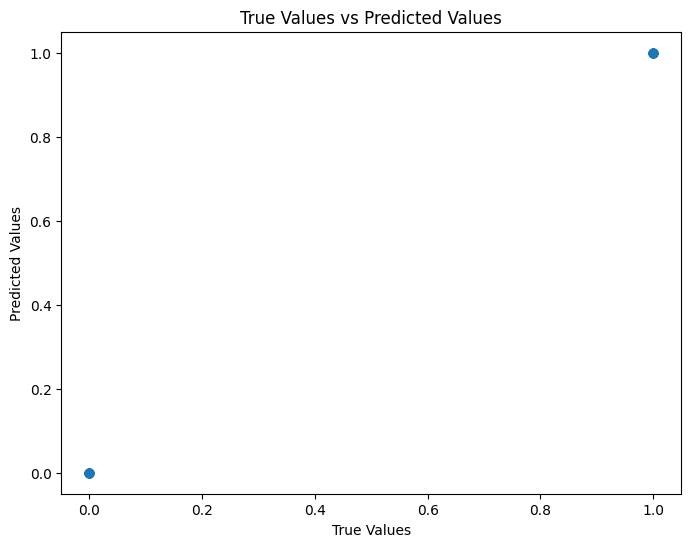

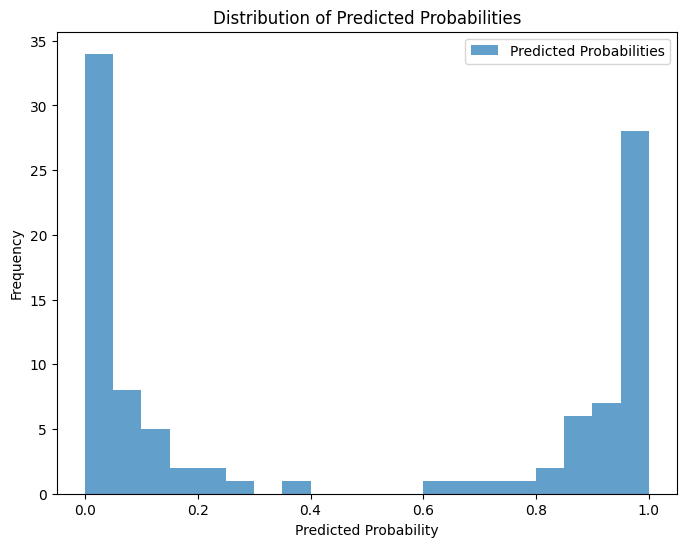

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model to perform binary classisfication
class BinaryClassificationNN(nn.Module):
    def __init__(self):
        super(BinaryClassificationNN, self).__init__()
        self.fc1 = nn.Linear(6, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, criterion, and optimizer
model = BinaryClassificationNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Example dummy data for training
X_train = torch.randn(100, 6)
y_train = torch.randint(0, 2, (100, 1)).float()

# Visualize the synthetic training data
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.scatter(X_train[:, i].numpy(), y_train.numpy(), alpha=0.6)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
plt.suptitle('Synthetic Training Data')
plt.show()

# Training loop
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Visualize the predictions
model.eval()
with torch.no_grad():
    predictions = model(X_train)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).float()

plt.figure(figsize=(8, 6))
plt.scatter(y_train.numpy(), predicted_labels.numpy(), alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

# Optionally, visualize the distribution of predictions
plt.figure(figsize=(8, 6))
plt.hist(predictions.numpy(), bins=20, alpha=0.7, label='Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()